### Architecture of Model-1 ,that I build in this NoteBook: Using 1D convolutions with word embeddings 

<img src='https://i.imgur.com/fv1GvFJ.png'>

### Architecture of Model-2 , that I build in this NoteBook: Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">


<img src='https://i.imgur.com/EuuoJtr.png'>

#### Loading all  Files and storing them in a Pandas dataframe  With his class_labels

In [1]:
import os
import pandas as pd

In [ ]:
path = r"C:\Users\AC\Downloads\Documents"
all_files = os.listdir(path)

In [ ]:
print(all_files)

['alt.atheism_49960.txt', 'alt.atheism_51060.txt', 'alt.atheism_51119.txt', 'alt.atheism_51120.txt', 'alt.atheism_51121.txt', 'alt.atheism_51122.txt', 'alt.atheism_51123.txt', 'alt.atheism_51124.txt', 'alt.atheism_51125.txt', 'alt.atheism_51126.txt', 'alt.atheism_51127.txt', 'alt.atheism_51128.txt', 'alt.atheism_51130.txt', 'alt.atheism_51131.txt', 'alt.atheism_51132.txt', 'alt.atheism_51133.txt', 'alt.atheism_51134.txt', 'alt.atheism_51135.txt', 'alt.atheism_51136.txt', 'alt.atheism_51139.txt', 'alt.atheism_51140.txt', 'alt.atheism_51141.txt', 'alt.atheism_51142.txt', 'alt.atheism_51143.txt', 'alt.atheism_51144.txt', 'alt.atheism_51145.txt', 'alt.atheism_51146.txt', 'alt.atheism_51147.txt', 'alt.atheism_51148.txt', 'alt.atheism_51149.txt', 'alt.atheism_51150.txt', 'alt.atheism_51151.txt', 'alt.atheism_51152.txt', 'alt.atheism_51153.txt', 'alt.atheism_51154.txt', 'alt.atheism_51155.txt', 'alt.atheism_51156.txt', 'alt.atheism_51157.txt', 'alt.atheism_51158.txt', 'alt.atheism_51159.txt',

In [ ]:
whole_data = []
for fle in all_files:
   with open(os.path.join(path, fle),"r") as f:
        data_of_new_file = []
        class_label_of_file = fle.split("_")[0]
        text = f.read()
        data_of_new_file.append(text)
        data_of_new_file.append(class_label_of_file)
        whole_data.append(data_of_new_file)

In [ ]:
dataframe = None
dataframe = pd.DataFrame(whole_data, columns = ['Text', 'Class_labels']) 
dataframe.head()

In [ ]:
dataframe.to_csv('documents_csv_file.csv',index = False)

## Loading Data

In [ ]:
import pandas as pd
import nltk
import os
import re

In [ ]:
data = pd.read_csv("documents_csv_file.csv")
print("Shape of Data is :",data.shape)
data.head()

Shape of Data is : (18271, 2)


,Text,Class_labels
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism


* STEP-1. Getting Preprocessed_emails List

## Data cleaning & Preprocessing.

In [ ]:
import re

In [ ]:
preprocessed_emails = []
email_pattern = "[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
for index in range(len(data)):
    test_text = data.loc[index]["Text"]
    emails = re.findall(email_pattern ,test_text,re.IGNORECASE)
    listt = []
    for email in emails:
        splits = email.split("@")
        splits.pop(0)
        new_string = splits[0]
        new_listt = new_string.split(".")
        listt.extend(new_listt)
    listt = [ele for ele in listt if (len(ele)> 2 and ele != "com")]
    final_preprocessed_email = str()
    for ele in listt:
        final_preprocessed_email = final_preprocessed_email+" "+str(ele)
        
    preprocessed_emails.append(final_preprocessed_email)

print(len(preprocessed_emails))

18271


* STEP-2. Replacing All Emails By Space In the original Text

In [ ]:
pattern = re.compile(email_pattern)

In [ ]:
for index in range(len(data)):
    old_text = data.loc[index]["Text"]
    new_text = pattern.sub('', old_text)
    data.loc[index]["Text"] = new_text

In [ ]:
data.head()

,Text,Class_labels
0,From: mathew <>\nSubject: Alt.Atheism FAQ: Ath...,alt.atheism
1,From: mathew <>\nSubject: Alt.Atheism FAQ: Int...,alt.atheism
2,From: (Benedikt Rosenau)\nSubject: Re: Gospel...,alt.atheism
3,From: mathew <>\nSubject: Re: university viola...,alt.atheism
4,"From: (Rob Strom)\nSubject: Re: [soc.motss, e...",alt.atheism


* STEP-3. Getting preprocessed_subjects & Removing subject line from original text

In [ ]:
preprocessed_subjects = []

for index in range(len(data)):
    text = data.loc[index]["Text"]
    subject_line = re.search('Subject:.*',text).group(0)
    string = re.sub("[a-zA-Z]*:"," ",subject_line)
    preprocessed_subject = re.sub(r"\W"," ",string)
    preprocessed_subjects.append(preprocessed_subject)
    new_subject_line_removed_text = re.sub('Subject:.*'," " ,text)
    data.loc[index]["Text"] = new_subject_line_removed_text

print(len(preprocessed_subjects))

18271


* STEP-5. Delete all the sentances where sentence starts with "Write to:" or "From:".

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    new_text = re.sub("From:.*"," ",text)
    final_text = re.sub("Write to:.*"," ",new_text)
    data.loc[index]["Text"] = final_text

* Step-6. Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    new_text = re.sub("<.*>"," ",text)
    data.loc[index]["Text"] = new_text

* STEP-7. Delete all the data which are present in the brackets. 

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    new_text = re.sub(r"\(.*\)"," ",text)
    data.loc[index]["Text"] = new_text

* STEP-8. Remove all the newlines('\n'), tabs('\t'), "-", "\".

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    text = re.sub(r"\n"," ",text)
    text = re.sub(r"\t"," ",text)
    new_text = re.sub(r"-"," ",text)
    data.loc[index]["Text"] = new_text

* STEP-9. Remove all the words which ends with ":"

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    a= re.findall('\S+:', text)
    for i in range(len(a)):
        word=a[i]
        if word in text:
            text = text.replace(word," ")
    data.loc[index]["Text"] = text

* STEP-10. Decontractions, replace words like below to full words. 

In [ ]:
for index in range(len(data)):
    x = data.loc[index]["Text"]
    x = x.replace("won't","will not")
    x = x.replace("cannot","can not")
    x = x.replace("donot","do not")
    x = x.replace("can't","can not")
    x = x.replace("n't","not")
    x = x.replace("what's","what is")
    x = x.replace("it's","it is")
    x = x.replace("'ve","have")
    x = x.replace("i'm","i am")
    x = x.replace("'re'","are")
    x = x.replace("he's","he is")
    x = x.replace("she's","she is")
    x = x.replace("'s","own")
    x = x.replace("%","percent")
    x = x.replace("₹","rupee")
    x = x.replace("$","dollar")
    x = x.replace("€","euro")
    new_text = x.replace("'ll","will")
    data.loc[index]["Text"] = new_text

* STEP-11. Do chunking on the text you have after above preprocessing. 

In [ ]:
import nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

In [ ]:
def GPE_PERSON(PRE_data):
    GPE_lst=[]
    person_lst=[]
    for sent in nltk.sent_tokenize(PRE_data):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                a=chunk.label()
                b=' '.join(c[0] for c in chunk)
                #print(a,b)
                if a=="GPE":
                    GPE_lst.append(b)
                elif a=="PERSON":
                    person_lst.append(b)
    return GPE_lst,person_lst

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    gpe_list,person_list = GPE_PERSON(text)
    for person in person_list:
        text = text.replace(person," ")
    for gpe in gpe_list:
        gpe_sublist = gpe.split(" ")
        if len(gpe_sublist)>1:
            new_gpe = '_'.join(map(str, gpe_sublist))
            text = text.replace(gpe,new_gpe)
    data.loc[index]["Text"] = text

* Step-13. Replace all the digits with space i.e delete all the digits. 

In [ ]:
for index in range(len(data)):
    new_text = data.loc[index]["Text"]
    def getNumbers(replace_num_text): 
        num_lst = re.findall(r'\d', replace_num_text)
        #print(num_lst)
        for num in num_lst:
            replace_num_text=replace_num_text.replace(num," ")
        return replace_num_text
    new_text=getNumbers(new_text)
    data.loc[index]["Text"] = new_text

* STEP-14. After doing above points, we observed there might be few word's like
  "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _) remove the _ from these type of words.

* STEP-15.  We also observed some words like  "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin , in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

In [ ]:
for index in range(len(data)):
    new_text = data.loc[index]["Text"]
    # Step 15
    new_text = re.sub("\s[a-zA-Z][a-zA-Z]_"," ",new_text)
    # Step 14
    match_list = re.findall("_[a-zA-z]*_",new_text)
    for word_with_ in match_list:
        final_word = word_with_[1:-1]
        new_text = new_text.replace(word_with_,final_word)
    data.loc[index]["Text"] = new_text

* STEP-16. Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

In [ ]:
for index in range(len(data)):
    new_text = data.loc[index]["Text"]
    new_text = new_text.lower()
    words_list_with_right_length = []
    words_list_with_any_length = new_text.split(" ")
    for word in words_list_with_any_length:
        if ((len(word)) > 2) and ((len(word)) <= 15):
            words_list_with_right_length.append(word)
    new_text = ' '.join(map(str, words_list_with_right_length))
    data.loc[index]["Text"] = new_text

17. replace all the words except "A-Za-z_" with space.

In [ ]:
for index in range(len(data)):
    text = data.loc[index]["Text"]
    final_text=re.sub(r'[^\w]', ' ', text)
    data.loc[index]["Text"] = final_text

#### Creating Preprocess Function for Evaluation

In [ ]:
import os
import nltk
import pandas as pd
import re

In [ ]:
def preprocess(Input_Text):
    # Step-1
    email_pattern = "[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+"
    test_text = Input_Text
    emails = re.findall(email_pattern ,test_text,re.IGNORECASE)
    listt = []
    for email in emails:
        splits = email.split("@")
        splits.pop(0)
        new_string = splits[0]
        new_listt = new_string.split(".")
        listt.extend(new_listt)
    listt = [ele for ele in listt if (len(ele)> 2 and ele != "com")]
    final_preprocessed_email = str()
    for ele in listt:
        final_preprocessed_email = final_preprocessed_email+" "+str(ele)
    
    # Step-2
    pattern = re.compile(email_pattern)
    new_text = pattern.sub('', test_text) 
    
    # Step-3
    subject_line = re.search('Subject:.*', new_text).group(0)
    string = re.sub("[a-zA-Z]*:"," ",subject_line)
    preprocessed_subject = re.sub(r"\W"," ",string)
    new_subject_line_removed_text = re.sub('Subject:.*',r" ",new_text)
    
    # Step-4
    new_text = re.sub("From:.*"," ",new_subject_line_removed_text)
    new_text = re.sub("Write to:.*"," ",new_text)
    
    # Step-6
    new_text = re.sub("<.*>"," ",new_text)
    
    # Step-7
    new_text = re.sub(r"\(.*\)"," ",new_text)
    
    # Step-8
    new_text = re.sub(r"\n"," ",new_text)
    new_text = re.sub(r"\t"," ",new_text)
    new_text = re.sub(r"-"," ",new_text)
    #text = re.sub(">"," ",text)
    new_text = re.sub(r"\ "," ",new_text)
    
    # Step-9
    a= re.findall('\S+:',new_text)
    for i in range(len(a)):
        word=a[i]
        if word in new_text:
            new_text = new_text.replace(word," ")
    
    # Step-10
    x = new_text
    x = x.replace("won't","will not")
    x = x.replace("cannot","can not")
    x = x.replace("donot","do not")
    x = x.replace("can't","can not")
    x = x.replace("n't","not")
    x = x.replace("what's","what is")
    x = x.replace("it's","it is")
    x = x.replace("'ve","have")
    x = x.replace("i'm","i am")
    x = x.replace("'re'","are")
    x = x.replace("he's","he is")
    x = x.replace("she's","she is")
    x = x.replace("'s","own")
    x = x.replace("%","percent")
    x = x.replace("₹","rupee")
    x = x.replace("$","dollar")
    x = x.replace("€","euro")
    new_text = x.replace("'ll","will")
    
    # Step-11
    def GPE_PERSON(PRE_data):
        GPE_lst=[]
        person_lst=[]
        for sent in nltk.sent_tokenize(PRE_data):
            for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
                if hasattr(chunk, 'label'):
                    a=chunk.label()
                    b=' '.join(c[0] for c in chunk)
                    #print(a,b)
                    if a=="GPE":
                        GPE_lst.append(b)
                    elif a=="PERSON":
                        person_lst.append(b)
        return GPE_lst,person_lst
    
    gpe_list,person_list = GPE_PERSON(new_text)
    for person in person_list:
        new_text = new_text.replace(person," ")
    for gpe in gpe_list:
        gpe_sublist = gpe.split(" ")
        if len(gpe_sublist)>1:
            new_gpe = '_'.join(map(str, gpe_sublist))
            new_text = new_text.replace(gpe,new_gpe)
    
    
    # Step-13
    def getNumbers(replace_num_text): 
        num_lst = re.findall(r'\d', replace_num_text)
        #print(num_lst)
        for num in num_lst:
            replace_num_text=replace_num_text.replace(num," ")
        return replace_num_text
    new_text=getNumbers(new_text)
    
    # Step-15
    new_text = re.sub("\s[a-zA-Z][a-zA-Z]_"," ",new_text)
    
    # Step-14
    match_list = re.findall("_[a-zA-z]*_",new_text)
    for word_with_ in match_list:
        final_word = word_with_[1:-1]
        new_text = new_text.replace(word_with_,final_word)
    
    # step-16
    new_text = new_text.lower()
    words_list_with_right_length = []
    words_list_with_any_length = new_text.split(" ")
    for word in words_list_with_any_length:
        if ((len(word)) > 2) and ((len(word)) <= 15):
            words_list_with_right_length.append(word)
    new_text = ' '.join(map(str, words_list_with_right_length))
    
    
    # Step-17
    final_text=re.sub(r'[^\w]', ' ', new_text)
    
    
    return (final_preprocessed_email,preprocessed_subject,final_text)

In [ ]:
path = r"C:\Users\AC\Downloads\Documents"
fle = 'alt.atheism_49960.txt'

In [ ]:
import os
with open(os.path.join(path, fle),"r") as f:
    class_label_of_file = fle.split("_")[0]
    text = f.read()

In [ ]:
#print(text)

In [ ]:
output_of_sample_file = preprocess(text)
print(len(output_of_sample_file))

3


In [ ]:
print("final_preprocessed_email is :",output_of_sample_file[0])
print('*'*100)
print("final_preprocessed_subject is :",output_of_sample_file[1])
print('*'*100)
print("final_text is :",output_of_sample_file[2])

final_preprocessed_email is :  mantis netcom mantis
****************************************************************************************************
final_preprocessed_subject is :   Alt Atheism   Atheist Resources
****************************************************************************************************
final_text is : archive alt atheism archive resources last december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the us  evolution designs evolution designs sell the fish   itown fish symbol  like the ones stick their cars  but with feet and the word written inside  the deluxe moulded plastic fish dollar postpaid the us  people the san francisco bay area can get fish from try mailing for net people who directly  the price dollar per fish  american atheist press aap publish various atheist books critiques the bible 

#### Creating Final Dataframe

In [ ]:
data["Preprocessed_emails"] = preprocessed_emails

In [ ]:
data["Preprocessed_subjects"] = preprocessed_subjects

In [ ]:
data.head()

,Text,Class_labels,Preprocessed_emails,Preprocessed_subjects
0,archive alt atheism archive resources last dec...,alt.atheism,mantis netcom mantis,Alt Atheism Atheist Resources
1,archive alt atheism archive introduction last ...,alt.atheism,mantis mantis mantis,Alt Atheism Introduction to Atheism
2,article well has quite different not neces...,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,Gospel Dating
3,recently ras have been ordered and none have...,alt.atheism,mantis kepler unh edu,university violating separation of church ...
4,article however hate economic terrorism and p...,alt.atheism,Watson Ibm Com harder ccr-p ida org harder cc...,soc motss et al Princeton axes matchi...


In [ ]:
data.to_csv('Preprocessed_documents_csv_file.csv',index = False)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Preprocessed_documents_csv_file.csv')
print(data.shape)
data.head()

(18271, 4)


,Text,Class_labels,Preprocessed_emails,Preprocessed_subjects
0,archive alt atheism archive resources last dec...,alt.atheism,mantis netcom mantis,Alt Atheism Atheist Resources
1,archive alt atheism archive introduction last ...,alt.atheism,mantis mantis mantis,Alt Atheism Introduction to Atheism
2,article well has quite different not neces...,alt.atheism,dbstu1 tu-bs mimsy umd edu umd edu,Gospel Dating
3,recently ras have been ordered and none have...,alt.atheism,mantis kepler unh edu,university violating separation of church ...
4,article however hate economic terrorism and p...,alt.atheism,Watson Ibm Com harder ccr-p ida org harder cc...,soc motss et al Princeton axes matchi...


In [ ]:
combined_text_for_model = []
class_lables = []
for index in range(len(data)):
    text = data.loc[index]["Text"]
    preprocessed_email = data.loc[index]["Preprocessed_emails"]
    preprocessed_subject = data.loc[index]["Preprocessed_subjects"]
    class_label = data.loc[index]["Class_labels"]
    #print("*"*100)
    #print("index number is ",index)
    #print("type of text :",type(text))
    #print("type of preprocessed_email :",type(preprocessed_email))
    #print("type of preprocessed_subject :",type(preprocessed_subject))
    final_text = str(text)+" "+str(preprocessed_email)+" "+str(preprocessed_subject)
    combined_text_for_model.append(final_text)
    class_lables.append(class_label)

In [ ]:
dataframe = pd.DataFrame()

In [ ]:
dataframe["combined_text_for_model"] = combined_text_for_model
dataframe["class_lables"] = class_lables

In [ ]:
dataframe.head()

,combined_text_for_model,class_lables
0,archive alt atheism archive resources last dec...,alt.atheism
1,archive alt atheism archive introduction last ...,alt.atheism
2,article well has quite different not neces...,alt.atheism
3,recently ras have been ordered and none have...,alt.atheism
4,article however hate economic terrorism and p...,alt.atheism


In [ ]:
dataframe.to_csv("final_preprocessed_documents_file_for_model.csv",index = False)

# Building Deep Conv1D Models.

### Model-1 (Word Lavel Embeddings With Glove Vectors.)

In [130]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_csv("final_preprocessed_documents_file_for_model.csv")
print("Shape of Data is :",data.shape)
data.head()

Shape of Data is : (18271, 2)


,combined_text_for_model,class_lables
0,archive alt atheism archive resources last dec...,alt.atheism
1,archive alt atheism archive introduction last ...,alt.atheism
2,article well has quite different not neces...,alt.atheism
3,recently ras have been ordered and none have...,alt.atheism
4,article however hate economic terrorism and p...,alt.atheism


In [132]:
data["class_lables"].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [133]:
data["class_lables"] = data["class_lables"].map({'alt.atheism':0 ,'comp.graphics':1 , 'comp.os.ms-windows.misc': 2 ,'comp.sys.ibm.pc.hardware' : 3 , 'comp.sys.mac.hardware' : 4 ,'comp.windows.x' :5 ,'misc.forsale' : 6,'rec.autos': 7, 'rec.motorcycles':7,'rec.sport.baseball' :9 ,'rec.sport.hockey' :10 , 'sci.crypt':11 , 'sci.electronics':12 ,'sci.med' :13 ,'sci.space' : 14,'soc.religion.christian' : 15, 'talk.politics.guns': 16,'talk.politics.mideast' :17 ,'talk.politics.misc': 18,'talk.religion.misc' :19})

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train,x_test,y_train,y_test = train_test_split(data.combined_text_for_model,data.class_lables,test_size = 0.25,stratify =data.class_lables,random_state = 42 )

In [136]:
print("Shape of x_train and y_train is :", x_train.shape , y_train.shape)
print("Shape of x_test and y_test is : ",x_test.shape , y_test.shape)

Shape of x_train and y_train is : (13703,) (13703,)
Shape of x_test and y_test is :  (4568,) (4568,)


In [137]:
y_train = tf.keras.utils.to_categorical(y_train, 20) 
y_test = tf.keras.utils.to_categorical(y_test, 20)

In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [139]:
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n') # Removed "_"
t.fit_on_texts(x_train)
vocab_size = len(t.word_index) + 1
print("Vocab size is :",vocab_size)

Vocab size is : 75385


In [140]:
encoded_x_train = t.texts_to_sequences(x_train)
print("Total documents in encoded_x_train We have :",len(encoded_x_train))
encoded_x_test = t.texts_to_sequences(x_test)
print("Total documents in encoded_x_test We have :",len(encoded_x_test))

Total documents in encoded_x_train We have : 13703
Total documents in encoded_x_test We have : 4568


In [141]:
# Finding max length
lengths = []
for encoded_sequence in encoded_x_train:
    length = len(encoded_sequence)
    lengths.append(length)
max_length = max(lengths)
print("In Any document Maximum words are :",max_length)

In Any document Maximum words are : 9740


In [142]:
# Padding 
padded_docs_x_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_x_train, maxlen=max_length, padding='post')
padded_docs_x_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_x_test, maxlen=max_length, padding='post')

In [143]:
embeddings_index = dict()
f = open('glove.6B.300d.txt' ,encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [144]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [145]:
tf.keras.backend.clear_session()

In [146]:
#from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Concatenate ,Input

In [147]:
# defining model

# Input layer
input_layer = Input(shape = (max_length,))

# Adding 1st embedding layer
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)

# Block_1
conv_1_block1 = Conv1D(12,3,activation = "relu")(embedding_layer)
conv_2_block1 = Conv1D(12,3,activation = "relu")(embedding_layer)
conv_3_block1 = Conv1D(12,3,activation = "relu")(embedding_layer)

# concatenating block_1 Conv1d layers
concatenate_layer_1 = Concatenate(axis=1)([conv_1_block1, conv_2_block1,conv_3_block1])

# Maxpooling layer 1
maxpool_layer_1 = MaxPooling1D(pool_size=4)(concatenate_layer_1)

# Block_2
conv_1_block2 = Conv1D(10,3,activation = "relu")(maxpool_layer_1)
conv_2_block2 = Conv1D(10,3,activation = "relu")(maxpool_layer_1)
conv_3_block2 = Conv1D(10,3,activation = "relu")(maxpool_layer_1)

# concatenating block_2 Conv1d layers
concatenate_layer_2 = Concatenate(axis=1)([conv_1_block2, conv_2_block2,conv_3_block2])

# Maxpooling layer 1
maxpool_layer_2 = MaxPooling1D(pool_size=4)(concatenate_layer_2)

# Block_3
conv_1_block3 = Conv1D(8,3,activation = "relu")(maxpool_layer_2)

# Flatten_layer
flatten_layer = Flatten()(conv_1_block3)

# Dropout_layer
dropout_layer = Dropout(0.5)(flatten_layer)

# dense_1 Layer
dense_1_layer = Dense(126, activation='relu')(dropout_layer)

# dense_2 Layer
dense_2_layer = Dense(16, activation='relu')(dense_1_layer)

# Output_layer
output_layer = Dense(20, activation='softmax')(dense_2_layer)

In [148]:
model_1 = None
model_1 = tf.keras.Model(inputs = input_layer, outputs = output_layer)
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9740)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 9740, 300)    22615500    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 9738, 12)     10812       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 9738, 12)     10812       embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
#! pip install pydot
#! pip install graphviz
! pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=e587f0df38e52e1868bb12a29ee8e546de6064de74f91ac7c03ecb253b202430
  Stored in directory: c:\users\ac\appdata\local\pip\cache\wheels\1e\7b\04\7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [ ]:
import pydot
import graphviz
import os

In [ ]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

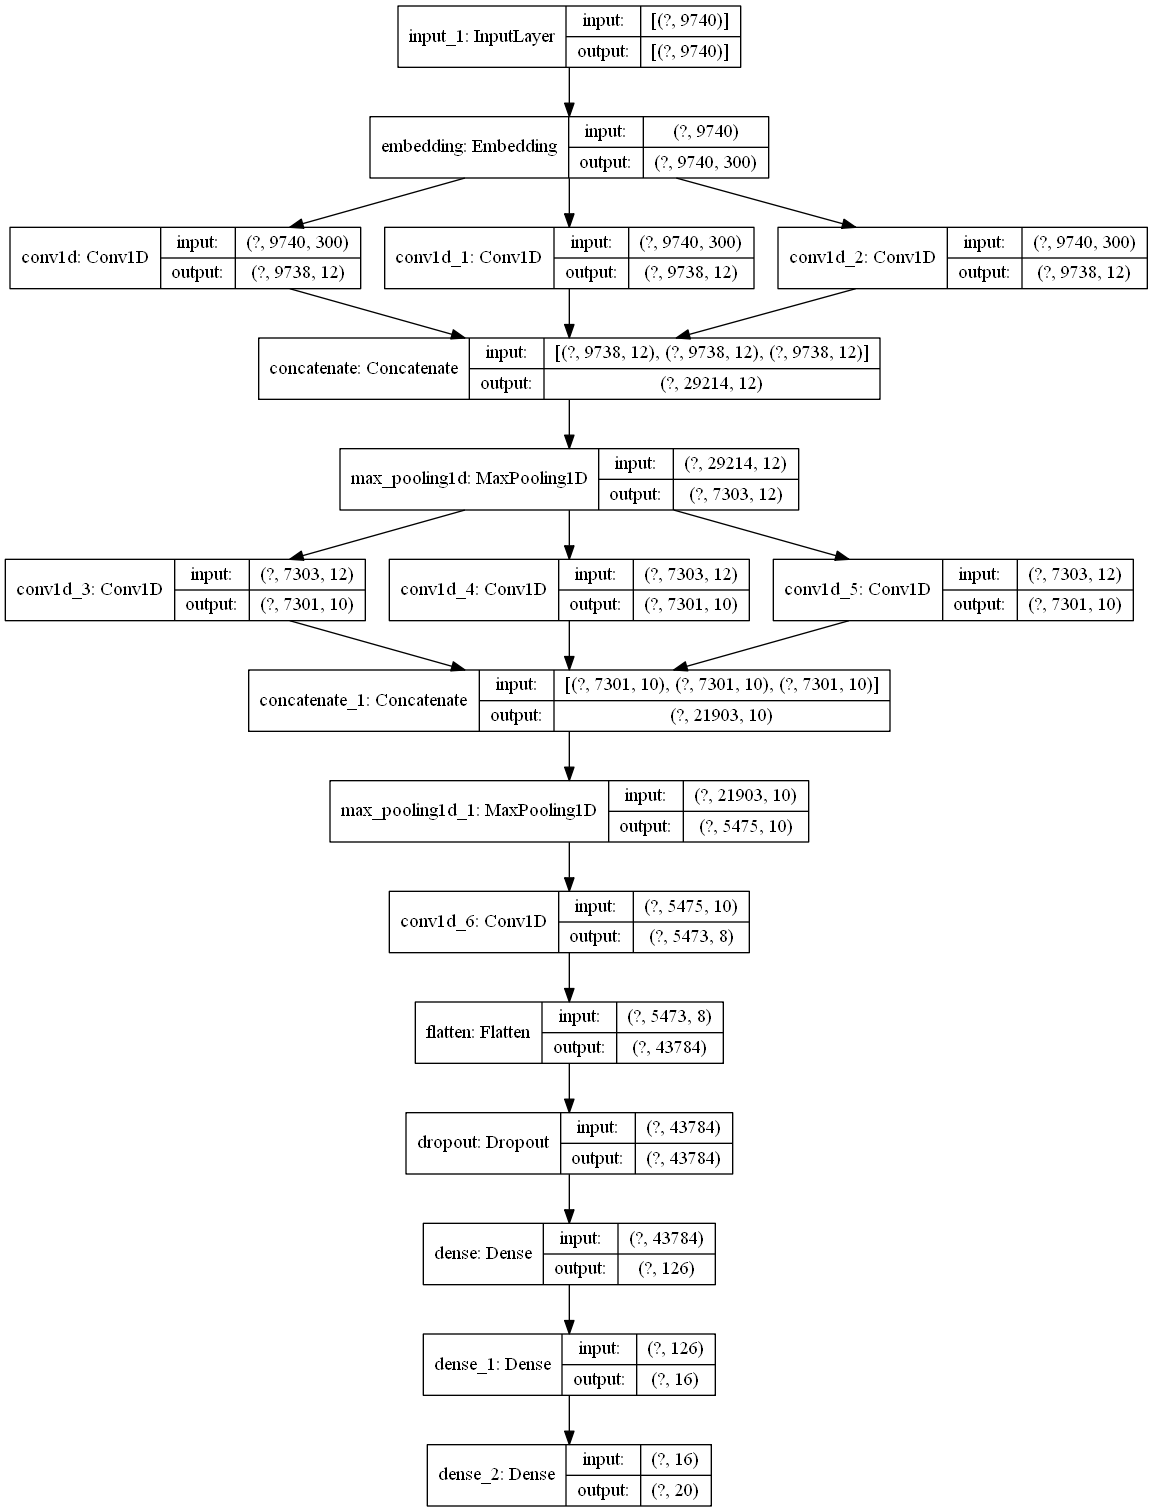

In [ ]:
tf.keras.utils.plot_model(model_1,to_file='model_1.png',show_shapes = True)

In [149]:
from sklearn.metrics import f1_score

class Metrics_callback(tf.keras.callbacks.Callback):
    def __init__(self,validation_data):
        super(Metrics_callback,self).__init__()
        self.validation_data = validation_data
        
    def on_train_begin(self,logs = {}):
        self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[],'microf1':[]}
        
    def on_epoch_end(self,epoch,logs = {}):
        X_test = self.validation_data[0]
        Y_test = self.validation_data[1]
        y_pred = (np.asarray(self.model.predict(X_test))).round()
        microf1score = f1_score(Y_test,y_pred,average = "micro")
        print(f'- micro F1 score : {round(microf1score,6)}')
        self.history['microf1'].append(microf1score)
        
metrics_cbk = Metrics_callback(validation_data = (padded_docs_x_test, y_test))

In [150]:
# for Tensorboard
import os
import datetime
logdir = os.path.join("new_model_1_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [151]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [152]:
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
               )

In [153]:
history = model_1.fit(padded_docs_x_train, y_train,
                    #class_weight = class_weights_d,
                    epochs=5,
                    verbose=True,
                    validation_data=(padded_docs_x_test, y_test),
                    batch_size=64,
                     callbacks = [tensorboard_callback,metrics_cbk])

Train on 13703 samples, validate on 4568 samples
Epoch 1/5
13703/13703 [==============================] - 1151s 84ms/sample - loss: 2.1536 - accuracy: 0.3185 - val_loss: 1.2191 - val_accuracy: 0.5898
Epoch 2/5
13703/13703 [==============================] - 1148s 84ms/sample - loss: 1.0578 - accuracy: 0.6526 - val_loss: 0.9259 - val_accuracy: 0.6975
Epoch 3/5
13703/13703 [==============================] - 1161s 85ms/sample - loss: 0.8123 - accuracy: 0.7259 - val_loss: 0.8534 - val_accuracy: 0.7204
Epoch 4/5
13703/13703 [==============================] - 1222s 89ms/sample - loss: 0.6707 - accuracy: 0.7771 - val_loss: 0.7668 - val_accuracy: 0.7546
Epoch 5/5
13703/13703 [==============================] - 1182s 86ms/sample - loss: 0.5843 - accuracy: 0.8024 - val_loss: 0.7568 - val_accuracy: 0.7607


In [154]:
model_1.save("model_1.h5")

In [2]:
#%load_ext tensorboard

In [3]:
#%tensorboard --logdir new_model_1_logs

### Observations 

* In this first model we use word embeddings. we use pretraied glove vectors. which returns a 300 dim vector for each word thats why we have approx 2crore params. in which only 55lac params are trainable. Because we made embedding layer non_trainable which contains a large amount of total parameters. when we start training it we get almost 59% auc in just 1st epoch. if we see in prospective of just 1st epoch 59% acc is huge. i mean we get very good results in justt 1st epoch. it could be bcoz of we are using pretrained word embedding which already trained on billions of words..... by the end of 2nd epoch we beat our accuracy thresold(60%) by a big margin and get 69% acc. its really good to see that in just 2 epochs we get almost 70% acc....As epoch number sare increasing our accuracy is also increasing and finally at end of 5th epoch we get acc of 76%. its super.. :)

##  Model-2 (Correcter Level Embeddings With Glove character pretrained Vectors)

In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("final_preprocessed_documents_file_for_model.csv")
print("Shape of Data is :",data.shape)
data.head()

Shape of Data is : (18271, 2)


,combined_text_for_model,class_lables
0,archive alt atheism archive resources last dec...,alt.atheism
1,archive alt atheism archive introduction last ...,alt.atheism
2,article well has quite different not neces...,alt.atheism
3,recently ras have been ordered and none have...,alt.atheism
4,article however hate economic terrorism and p...,alt.atheism


In [15]:
data["class_lables"].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [16]:
data["class_lables"] = data["class_lables"].map({'alt.atheism':0 ,'comp.graphics':1 , 'comp.os.ms-windows.misc': 2 ,'comp.sys.ibm.pc.hardware' : 3 , 'comp.sys.mac.hardware' : 4 ,'comp.windows.x' :5 ,'misc.forsale' : 6,'rec.autos': 7, 'rec.motorcycles':7,'rec.sport.baseball' :9 ,'rec.sport.hockey' :10 , 'sci.crypt':11 , 'sci.electronics':12 ,'sci.med' :13 ,'sci.space' : 14,'soc.religion.christian' : 15, 'talk.politics.guns': 16,'talk.politics.mideast' :17 ,'talk.politics.misc': 18,'talk.religion.misc' :19})

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data.combined_text_for_model,data.class_lables,test_size = 0.25,stratify =data.class_lables,random_state = 42 )

In [19]:
print("Shape of x_train and y_train is :", x_train.shape , y_train.shape)
print("Shape of x_test and y_test is : ",x_test.shape , y_test.shape)

Shape of x_train and y_train is : (13703,) (13703,)
Shape of x_test and y_test is :  (4568,) (4568,)


In [20]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [21]:
y_train = tf.keras.utils.to_categorical(y_train, 20) 
y_test = tf.keras.utils.to_categorical(y_test, 20)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [23]:
t = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',char_level=True, oov_token="UNK",) # Removed "_"
t.fit_on_texts(x_train)
vocab_size = len(t.word_index) + 1
print("Vocab size is :",vocab_size)

Vocab size is : 52


In [24]:
encoded_x_train = t.texts_to_sequences(x_train)
print("Total documents in encoded_x_train We have :",len(encoded_x_train))
encoded_x_test = t.texts_to_sequences(x_test)
print("Total documents in encoded_x_test We have :",len(encoded_x_test))

Total documents in encoded_x_train We have : 13703
Total documents in encoded_x_test We have : 4568


In [25]:
# Finding max length
lengths = []
for encoded_sequence in encoded_x_train:
    length = len(encoded_sequence)
    lengths.append(length)
max_length = max(lengths)
print("In Any document Maximum Characters are :",max_length)

In Any document Maximum Characters are : 57996


In [26]:
# Padding 
padded_docs_x_train = tf.keras.preprocessing.sequence.pad_sequences(encoded_x_train, maxlen=max_length, padding='post')
padded_docs_x_test = tf.keras.preprocessing.sequence.pad_sequences(encoded_x_test, maxlen=max_length, padding='post')

In [27]:
embeddings_index = dict()
f = open('glove.840B.300d-char.txt' ,encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 94 word vectors.


In [28]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [44]:
tf.keras.backend.clear_session()

In [45]:
#from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Dropout, Flatten, MaxPooling1D, Concatenate ,Input

In [46]:
# defining model

# Input layer
input_layer = Input(shape = (max_length,))

# Adding 1st embedding layer
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)(input_layer)

# Block_1
conv_1_block1 = Conv1D(12,4,activation = "relu")(embedding_layer)
conv_2_block1 = Conv1D(12,4,activation = "relu")(conv_1_block1)


# Maxpooling layer 1
maxpool_layer_1 = MaxPooling1D(pool_size=5)(conv_2_block1)

# Block_1
conv_1_block2 = Conv1D(10,4,activation = "relu")(maxpool_layer_1)
conv_2_block2 = Conv1D(10,4,activation = "relu")(conv_1_block2)

# Maxpooling layer 2
maxpool_layer_2 = MaxPooling1D(pool_size=4)(conv_2_block2)

# Flatten_layer
flatten_layer = Flatten()(maxpool_layer_2)

# Dropout_layer
dropout_layer = Dropout(0.5)(flatten_layer)

# dense_1 Layer
dense_1_layer = Dense(128, activation='relu')(dropout_layer)

# Output_layer
output_layer = Dense(20, activation='softmax')(dense_1_layer)

In [47]:
model_2 = None
model_2 = tf.keras.Model(inputs = input_layer, outputs = output_layer)
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 57996)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 57996, 300)        15600     
_________________________________________________________________
conv1d (Conv1D)              (None, 57993, 12)         14412     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 57990, 12)         588       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11598, 12)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11595, 10)         490       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11592, 10)         410   

In [33]:
import pydot
import graphviz
import os

In [34]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

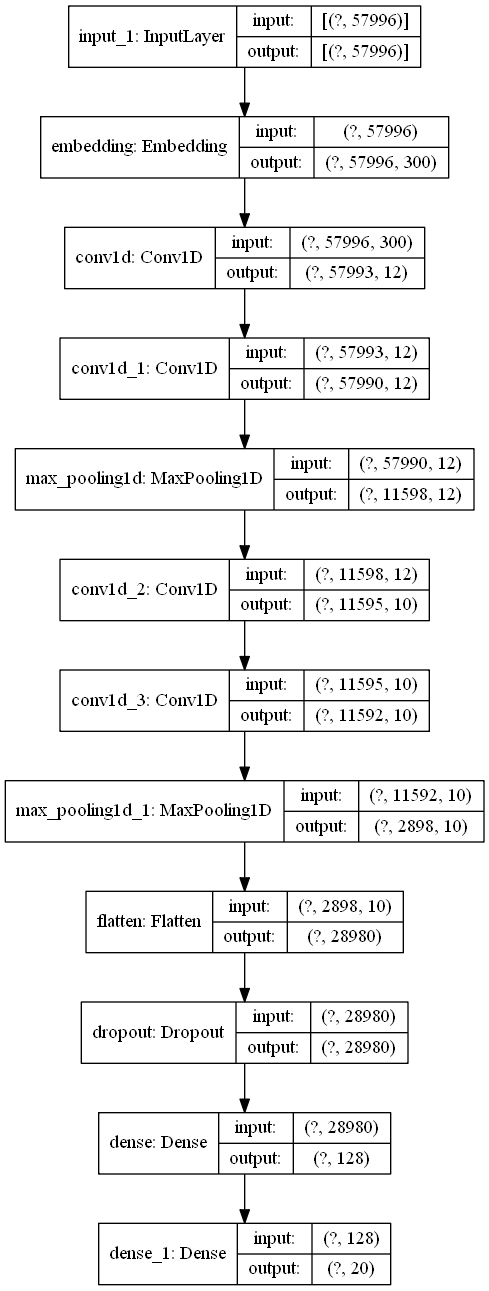

In [35]:
tf.keras.utils.plot_model(model_2,to_file='model_2.png',show_shapes = True)

In [48]:
from sklearn.metrics import f1_score

class Metrics_callback(tf.keras.callbacks.Callback):
    def __init__(self,validation_data):
        super(Metrics_callback,self).__init__()
        self.validation_data = validation_data
        
    def on_train_begin(self,logs = {}):
        self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[],'microf1':[]}
        
    def on_epoch_end(self,epoch,logs = {}):
        X_test = self.validation_data[0]
        Y_test = self.validation_data[1]
        y_pred = (np.asarray(self.model.predict(X_test))).round()
        microf1score = f1_score(Y_test,y_pred,average = "micro")
        print(f'- micro F1 score : {round(microf1score,6)}')
        self.history['microf1'].append(microf1score)
        
metrics_cbk = Metrics_callback(validation_data = (padded_docs_x_test, y_test))

In [49]:
# for Tensorboard
import os
import datetime
logdir = os.path.join("new_model_2_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [51]:
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
               )

In [52]:
history = model_2.fit(padded_docs_x_train, y_train,
                    epochs=3,
                    verbose=True,
                    validation_data=(padded_docs_x_test, y_test),
                    batch_size=32,
                     callbacks = [tensorboard_callback,metrics_cbk])

Train on 13703 samples, validate on 4568 samples
Epoch 1/3
13703/13703 [==============================] - 3515s 257ms/sample - loss: 2.8479 - accuracy: 0.1157 - val_loss: 2.8192 - val_accuracy: 0.1217
Epoch 2/3
13703/13703 [==============================] - 3490s 255ms/sample - loss: 2.8135 - accuracy: 0.1242 - val_loss: 2.8009 - val_accuracy: 0.1239
Epoch 3/3
13703/13703 [==============================] - 3703s 270ms/sample - loss: 2.7797 - accuracy: 0.1307 - val_loss: 2.7684 - val_accuracy: 0.1362


In [53]:
# For saving model
model_2.save("model_2.h5")

In [4]:
# Tensorboard plot of acc
#%load_ext tensorboard

In [5]:
#%tensorboard --logdir new_model_2_logs

### Observations 

* In this second model we use character embeddings. we use pretraied character embeddings. which returns a 300 dim vector for each character thats why we have approx 3.7 crore params. in which almost all(except 15k) params are trainable. Because we made embedding layer trainable which contains a large amount of total parameters.previously in model_1 we made this layer non_trainable thats why there we have small number of trainable params but here we have huge number of params to train. and its not at all easy to train such number of params on a normal machine. thats why our acc thresold is 10% i guess.. when we start training then after 1 epoch we get acc of just 12% but thats okey.. it was not unexpected..    so after all 3 epoch we get acc of 13% which is greataer than our  acc thresold.. so its good :)

#  Thanks For Coming !! :)